In [8]:
import os
import sys
import time as t_util
import numpy as np
import cftime
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import yaml


In [9]:
#Read main path
with open('../path_main.txt', 'r') as file:    path_main  = file.read()

dir_data_HSIchg = f'{path_main}Data/Plot_preparation/HSI_changes/'
dir_data_ThrExc = f'{path_main}Data/Plot_preparation/Threshold_Exceedance/'
dir_data_HWMId  = f'{path_main}Data/Plot_preparation/HWMId/'
dir_scripts     = f'{path_main}Scripts/'
dir_names       = f'{path_main}Scripts/Model_lists/'
dir_fig         = f'{path_main}Figures/Paper_v2/'
dir_repo        = f'{path_main}Data/RepositoryPublication/'
if not os.path.exists(dir_fig): os.mkdir(dir_fig)


## Prepare variables and parameters

In [10]:
#Define cities
#Sorted cities for spider plot
cities = ['Kharkiv', 'Kyiv', 'Kazan', 'NizhnyNovgorod', 'Moscow', 'Warsaw', 'Minsk', 'Vilnius', 'Riga',
          'SaintPetersburg', 'Helsinki', 'Stockholm', 'Oslo', 'Copenhagen', 'Berlin', 'Hamburg', 'Amsterdam',
          'Brussels', 'Dublin', 'London', 'Paris', 'Lisbon', 'Madrid', 'Barcelona', 'Rome', 'Milan', 'Athens',
          'Istanbul', 'Sofia', 'Bucharest', 'Belgrade', 'Zagreb', 'Budapest', 'Vienna', 'Munich', 'Prague']

# Load short city names
fname_city_short = dir_scripts + 'City_names_short.yml'
with open(fname_city_short, 'r') as file:
    city_names_short = yaml.safe_load(file)

cities_short = [city_names_short[city] for city in cities]
    
HSI_out = {'TN': 'TN', 
           'TX': 'TX'}
    
#Define scenarios and variables
RCP = 'rcp85'

#Define models and RCPs which should be used
models_CORDEX = dict()
models_CORDEX = []
with open(dir_names + 'Models_CORDEX-EUR-11_RCP85.txt', 'r') as filehandle:
    for line in filehandle:
        models_CORDEX.append(eval(line[:-1]))

#Define models and RCPs which should be used
models_CMIP5 = dict()
models_CMIP5 = []
with open(dir_names + 'Models_CMIP5_RCP85.txt', 'r') as filehandle:
    for line in filehandle:
        models_CMIP5.append(line[:-1])        
        

#Define models and RCPs which should be used
models_CMIP6 = dict()
models_CMIP6 = []
with open(dir_names + 'Models_CMIP6_SSP585.txt', 'r') as filehandle:
    for line in filehandle:
        models_CMIP6.append(line[:-1])        
        
models_set = dict()
models_set['CMIP5']       = models_CMIP5
models_set['CMIP6']       = models_CMIP6
models_set['EURO-CORDEX'] = models_CORDEX

#Define warming levels
EMT_change = '3.0K'#'1.0K', '2.0K', 


## Get GCMs of EURO-CORDEX

In [11]:
#Count occurrence of CORDEX GCMs
GCMs_COR_orig = [model[0] + '_' + model[2] for model in models_CORDEX]

GCMs_CORDEX = []
for GCM in GCMs_COR_orig:
    
    if 'MPI' in GCM or 'CNRM' in GCM:  GCMs_CORDEX.append("-".join(GCM.split('-')[2::]))
    else:                              GCMs_CORDEX.append("-".join(GCM.split('-')[1::]))

GCMs_unique = list(set(GCMs_CORDEX))
counts_GCMs = {GCM:GCMs_CORDEX.count(GCM) for GCM in GCMs_unique}


## Plot preparation

In [12]:
#Titles 1
tit_chg = dict()
tit_chg['JJA_mean'] = ' (JJA mean)'
tit_chg['Q90']      = ' (JJA, Q90)'
tit_chg['Ymax']     = 'x change'

#Titles 2
titles = dict()
titles['HSI-changes'] = lambda HSI, THR_level : HSI +  tit_chg[t_method] +  ' [°C]'
titles['Threshold-Exceedance'] = lambda HSI, THR_level: 'Exceedance ' + HSI + '>' + THR_levels_vals[HSI + '_' + THR_level] + '°C [d/y]'
titles['HWMId'] = lambda HSI, THR_level : 'HWMId-' + HSI

colors = dict()
colors['EURO-CORDEX']  = 'tab:red'
colors['CMIP5']        = 'darkorchid'
colors['CMIP5-CORDEX'] = 'darkorchid'
colors['CMIP6']        = 'k'  

THR_levels = dict()
THR_levels['TN']      = 3 # 20 °C
THR_levels['TX']      = 3 # 30 °C

THR_levels_vals = dict()
THR_levels_vals['TN_Level3']      = '20'
THR_levels_vals['TX_Level3']      = '30'

#Define agnles
angles_rad = np.linspace(0, 2 * np.pi, len(cities)+1)
angles_deg = np.linspace(0, 2 * np.pi, len(cities)+1)

#Define angles and horizontal alignment for output
hor_align = np.array(['left'] * len(angles_deg), dtype='<U8')
hor_align[np.cos(angles_deg) < 0] = 'right'
angles_deg[np.cos(angles_deg) < 0] = angles_deg[np.cos(angles_deg) < 0] + np.pi
angles_deg = np.rad2deg(angles_deg)

#Limits
r_lims = dict()
r_lims['HSI-changes'] =6.9
r_lims['Threshold-Exceedance'] = 125
r_lims['HWMId'] = 85

#Limits
ticks = dict()
ticks['HSI-changes'] = range(2, 7, 2)
ticks['Threshold-Exceedance'] = range(40, 130, 40)
ticks['HWMId'] = range(20, 90, 20)
ticks['HWMId_rlog'] = [3, 10, 30]


## Plot

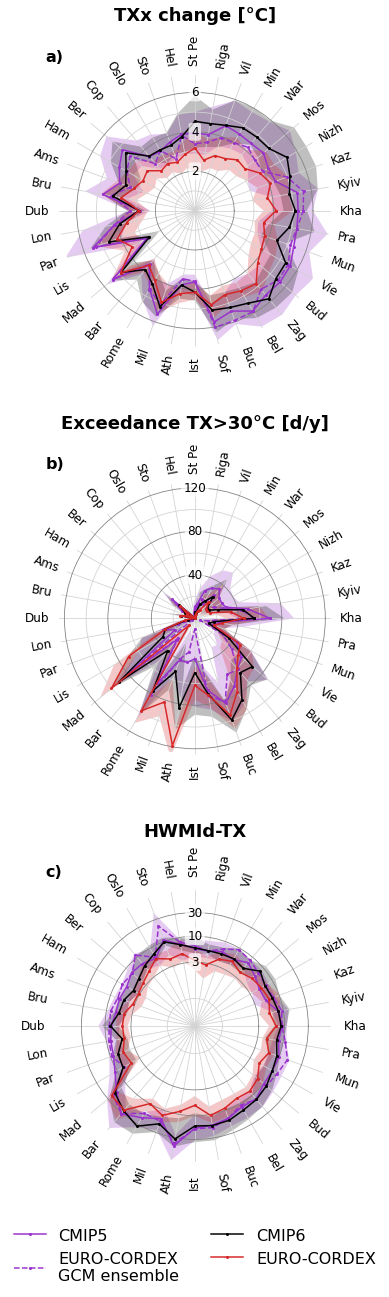

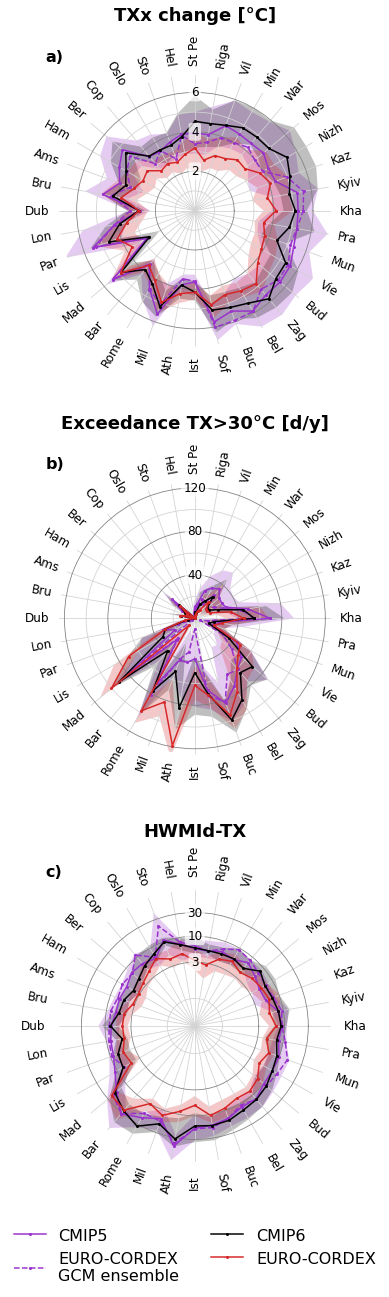

In [13]:
HSI = 'TX'

out_name = ''

HWMId_log = True

#Select methods to show in plot
methods = ['HSI-changes', 'Threshold-Exceedance', 'HWMId'] 
texts   = ['a)', 'b)', 'c)']

#Create figure
fig, axes = plt.subplots(3, 1, figsize=(8, 20), subplot_kw=dict(polar=True))

plt.subplots_adjust(hspace=0.5)
p_all   = []
leg_all = []
        
data_coll_out = dict()
for i0, (model_set, models) in enumerate(models_set.items()):

    if model_set=='CMIP6':
        scen = 'ssp585'
    else:
        scen = 'rcp85'
    
    #Select which time method to use for HSI changes (JJA mean, Q90, yearly maximum)
    t_method = 'Ymax'

    #Read data for HSI change
    data_HSIchg = xr.open_dataset(dir_data_HSIchg + model_set + '/HSIs-changes_' + scen + '_EMT.nc')
    data_HSIchg = data_HSIchg.sel(city=cities, EMT_change=EMT_change, t_method=t_method)

    #Read data for threshold exceedance
    data_ThrExc = xr.open_dataset(dir_data_ThrExc + model_set + '/HSIs-ThresholdExceedance_' + scen + '_EMT.nc')
    data_ThrExc = data_ThrExc.sel(city=cities, EMT_change=EMT_change)
    if model_set=='EURO-CORDEX':
        data_ThrExc = data_ThrExc.sel(transformation='no_trans')
    
    #Loop over methods
    for i1, method in enumerate(methods):

        ax = axes[i1]

        if method=='HWMId' and HWMId_log==True:
            log_add = '_rlog'
        else:
            log_add = ''            


        #Select data for plotting
        if method=='HSI-changes':

            data_plot = data_HSIchg[HSI]
            
            #Collect data to save in excel file
            data_coll_out[model_set + '_HSI-changes'] = data_plot
            
        elif method=='Threshold-Exceedance':

            data_plot = data_ThrExc
            THR_level = 'Level' + str(THR_levels[HSI])
            data_plot = data_plot.sel(THR_level=THR_level)[HSI]
            
            #Collect data to save in excel file
            data_coll_out[model_set + '_Threshold-Exceedance'] = data_plot
            
        elif method=='HWMId':

            data_HWMId = xr.open_dataset(dir_data_HWMId + model_set + '/HWMId' + out_name + '-' + HSI + '_' + scen + '_EMT.nc')
            data_plot  = data_HWMId.sel(city=cities, EMT_change=EMT_change, quantile='Q50').HWMID
            
            #Collect data to save in excel file
            data_coll_out[model_set + '_HWMId'] = data_plot
            
        #Calculate weighted average for CMIP5 models (to match the EURO-CORDEX GCM ensemble)
        if model_set=='CMIP5': 

            #Loop over GCMs used in CORDEX
            create = 1
            for GCM, N in counts_GCMs.items():

                #Replace r3i1p1 member of EC-EARTH with a different member, as no data exits for it
                if GCM=='EC-EARTH_r3i1p1':  GCM = 'EC-EARTH_r1i1p1'            

                #Select GCM and add it N times to arrray
                data_sel = data_plot.sel(model=GCM)
                for n in range(0, N):
                    if create==1:
                        data_plot_weighted = data_sel
                        create = 0
                    else:
                        data_plot_weighted = xr.concat((data_plot_weighted, data_sel), dim='N')

            #Calculate model average and moving average
            data_plot_weighted = data_plot_weighted.median('N')            
            
            #Select only one ensemble member per model for CMIP5
            models_sel = [model for model in data_plot.model.values if 'r1i1p1' in model]
            data_plot = data_plot.sel(model=models_sel)
            

        #Calculate median over models
        data_Q50 = data_plot.median('model')
        data_Q25 = data_plot.quantile(0.25, dim='model')
        data_Q75 = data_plot.quantile(0.75, dim='model')

        #Get values and repeat first value to close circle
        values_Q50 = data_Q50.sel(city=cities).values.tolist()
        values_Q25 = data_Q25.sel(city=cities).values.tolist()
        values_Q75 = data_Q75.sel(city=cities).values.tolist()
        values_Q50 += values_Q50[:1]
        values_Q25 += values_Q25[:1]
        values_Q75 += values_Q75[:1]

        #Plot
        ax.fill_between(angles_rad, values_Q25, values_Q75, color=colors[model_set], edgecolor='none', alpha=0.25)
        p = ax.plot(angles_rad, values_Q50, color=colors[model_set], marker='o', markersize=2)
        
        #Add plot handles for legend
        if i1==0:
            p_all.append(p[0])
            leg_all.append(model_set)
            
        #Add plot for weighted CMIP5 models 
        if model_set=='CMIP5':             

            #Get values and repeat first value to close circle
            values_Q50 = data_plot_weighted.sel(city=cities).values.tolist()
            values_Q50 += values_Q50[:1]

            #Plot
            p1 = ax.plot(angles_rad, values_Q50, color=colors[model_set], linestyle='--', marker='o', markersize=2)
        
            #Add plot handle for legend
            if i1==0:
                p_all.append(p1[0])
                leg_all.append('EURO-CORDEX\nGCM ensemble')


        if i0==2:

            #Set ticks
            ax.set_xticks(angles_rad[:-1])
            ax.set_xticklabels(cities_short)
            ax.set_rlabel_position(90)

            #Adjust rotation of labels
            plt.gcf().canvas.draw()
            for label, angle, h_align in zip(ax.get_xticklabels(), angles_deg, hor_align):
                x, y = label.get_position()
                y = 0.035
                lab = ax.text(x, y, label.get_text(), transform=label.get_transform(),
                              ha=label.get_ha(), va=label.get_va(), fontsize=12)
                lab.set_horizontalalignment(h_align)
                lab.set_rotation_mode("anchor")
                lab.set_rotation(angle)


            #Remove original tick labels
            ax.set_xticklabels([])
            ax.set_ylim([0, r_lims[method]])

            #Set scale for HWMId to logarithmic
            HWMId_log_out = ''
            if HWMId_log==True:
                HWMId_log_out = '_HWMId-log'
                if method=='HWMId':
                    ax.set_rscale('symlog')

            #Title
            ax.set_title(titles[method](HSI, THR_level), fontsize=18, fontweight='bold', pad=54)

            #Don't show black outer circle
            ax.spines['polar'].set_visible(False)

            #y-label
            y_ticks = ax.get_yticks()
            ax.set_yticks(y_ticks, minor=True)
            ax.set_yticks(ticks[method + log_add], minor=False)
            ax.set_yticklabels(ticks[method + log_add])
            ax.yaxis.grid(True, color='gray', which='major')
            ax.yaxis.grid(True, color='lightgray', which='minor')
            ax.xaxis.grid(True, color='lightgray')

            #Adjust y-ticks
            for label in ax.get_yticklabels():
                label.set_visible(False)
                _, y_str = label.get_position()
                ax.text(1 * np.pi/2, y_str, label.get_text(), ha='center', va='center', color='k', fontsize=12, zorder=10,
                        bbox=dict(facecolor='white', edgecolor='None',alpha=0.7, boxstyle="round,pad=0.2"))

            #Set y-limit
            ax.set_ylim([0, r_lims[method]])
            
            #Write letters
            ax.text(-0.05, 1.05, texts[i1], fontsize=16, fontweight='bold', transform=ax.transAxes)
            

    #Remove one axis        
    axes[-1].legend(p_all, leg_all, frameon=False, fontsize=16,
                    ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.5))

#Save figure
fig_name = 'Fig7_'
fig.savefig(dir_fig + fig_name + 'Spider_dEMT' + EMT_change + out_name + HWMId_log_out + '_CORDEX_CMIP.png', bbox_inches='tight', dpi=300)
# fig.savefig(dir_fig + fig_name + 'Spider_dEMT' + EMT_change + out_name + HWMId_log_out + '_vA' + str(len(methods)) + '_IQR.pdf', bbox_inches='tight')


## Export data to excel

In [14]:
#Define HSI and threshold level
HSI ='TX'
THR_level = 'Level' + str(THR_levels[HSI])

#output names
names = dict()
names['HSI-changes'] = lambda HSI, THR_level : HSI +  tit_chg[t_method]
names['Threshold-Exceedance'] = lambda HSI, THR_level: 'Exceedance ' + HSI + '>' + THR_levels_vals[HSI + '_' + THR_level] + '°C'
names['HWMId'] = lambda HSI, THR_level :  'HWMId-' + HSI

#Define units
units = dict()
units['HSI-changes'] = 'unit: K'
units['Threshold-Exceedance'] = 'unit: d/y'
units['HWMId'] ='unit: 1'


for model_set in ['CMIP5', 'CMIP6']:
    
    #Define output file name
    fname_out = dir_repo + 'Data_Fig7_' + HSI + '-ambient-heat_' + model_set + '_DeltaESAT-3C.xlsx'
    if os.path.exists(fname_out):  os.remove(fname_out)

    #Create excel file
    with pd.ExcelWriter(fname_out, mode="w") as writer:

        #Loop over methods
        for method in methods:

            name = names[method](HSI, THR_level)

            #Select data
            data = data_coll_out[model_set + '_' + method].median('model')

            #Drop unnecessary coordinates
            coords_drop = [coord for coord in data.coords if coord!='city']
            data = data.drop(coords_drop)

            #Convert to data frame
            data = data.to_dataframe(name=name)

            #Sort cities alphabetically
            data = data.sort_index()
            
            #Add unit
            data.index = data.index.rename(units[method])
            data.columns = data.columns.rename('')

            #Save in file
            data.to_excel(writer, sheet_name=name, float_format="%.2f")
